In [1]:
import pandas as pd
import numpy as np

In [3]:
df_mortgage = pd.read_csv('../data/0_raw/Mortgage.csv')
print(len(df_mortgage))
df_mortgage.head()

32561


,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409


In [4]:
df_campaign = pd.read_csv('../data/0_raw/Campaign.csv')
print(len(df_campaign))
df_campaign.head()

32060


,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,education_num,familiarity_FB,view_FB,interested_insurance,company_email,created_account
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,17,7,9,0,jrhodes@jones.com,No
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,17,9,6,1,william32@carey.com,No
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,12,5,4,1,smithvanessa@coles.org,No
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,9,9,2,0,sbarrett@hart.biz,No
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,17,8,9,1,lparkinson@butler.com,No


In [5]:
df_campaign['familiarity_FB'].value_counts().sort_index()

1     2838
2     3504
3     3432
4     3461
5     3547
6     3493
7     3494
8     3486
9     3467
10    1338
Name: familiarity_FB, dtype: int64

In [6]:
df_campaign['interested_insurance'].value_counts()

0    18438
1    13622
Name: interested_insurance, dtype: int64

In [8]:
print(df_campaign['created_account'].value_counts())
print(df_campaign['created_account'].value_counts(normalize=True))

No     2787
Yes     240
Name: created_account, dtype: int64
No     0.920714
Yes    0.079286
Name: created_account, dtype: float64


In [9]:
df_campaign['created_account'].unique()

array(['No', 'Yes', nan], dtype=object)

## Crate a column we can use to merge the tables

In [10]:
titles = df_campaign['name_title'].dropna().unique().tolist()
titles

['Mr.', 'Miss', 'Dr.', 'Ms.', 'Mrs.']

In [11]:
# check campaign name legths
print('first name', df_campaign['first_name'].str.split(' ').apply(len).value_counts())
print('last name', df_campaign['last_name'].str.split(' ').apply(len).value_counts())

first name 1    32060
Name: first_name, dtype: int64
last name 1    32060
Name: last_name, dtype: int64


In [12]:
df_mortgage['full_name'].str.split(' ').apply(len).describe()

count    32561.000000
mean         2.942631
std          0.693619
min          2.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: full_name, dtype: float64

In [13]:
def decompose_name(name:str, name_titles=titles):
    """
    TODO
    """
    
    split_name = name.split(' ')
    
    # TODO: check length
    
    if split_name[0] in name_titles:
        name_title = split_name[0]
        first_name = split_name[1]
        last_name = split_name[-1]
    else:
        name_title = np.NaN
        first_name = split_name[0]
        last_name = split_name[-1]
    
    return pd.Series([name_title, first_name, last_name])

In [14]:
decompose_name('Mr. Craig Marc Davis')

0      Mr.
1    Craig
2    Davis
dtype: object

In [15]:
# df_mortgage['full_name'].apply(lambda name: decompose_name(name))
# df_mortgage['full_name'] #, axis=1, result_type='expand'

In [16]:
# df_campaign[(df_campaign['name_title']=='Dr.') & \
#             ((df_campaign['first_name']=='Barry') | (df_campaign['last_name']=='Moore'))]

In [17]:
df_mortgage[['name_title', 'first_name', 'last_name']] = df_mortgage['full_name'].apply(lambda name: decompose_name(name))

In [18]:
df_mortgage

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,...,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,name_title,first_name,last_name
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,...,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,Mr.,Dale,Coles
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,...,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,NaN,Joel,Allen
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,...,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,Mr.,Craig,Davis
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,...,Male,Christianity,Husband,Black,United Kingdom,Private,234721,Mr.,Brandon,Thornton
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,...,Female,Christianity,Wife,Black,Sweden,Private,338409,Miss,Brett,Fletcher
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Miss Tom Williams,1991-05-13,Swindon,NW384000,£19073 yearly,0,9,38,0,0,...,Female,Christianity,Wife,White,United Kingdom,Private,257302,Miss,Tom,Williams
32557,Dr. Barry Sean Moore,1977-10-16,Edinburgh,42839712,266309946.37SOS,17,2,40,0,0,...,Male,Christianity,Husband,White,United Kingdom,Private,154374,Dr.,Barry,Moore
32558,Cameron Alexander,1959-04-30,Edinburgh,27584132,£1752.24 per month,21,3,40,0,0,...,Female,Christianity,Unmarried,White,United Kingdom,Private,151910,NaN,Cameron,Alexander
32559,Mr. Peter Mann,1996-12-09,Edinburgh,29357307,£24848 yearly,2,9,20,0,0,...,Male,Christianity,Own-child,White,United Kingdom,Private,201490,Mr.,Peter,Mann


## Merge

In [19]:
df_merged = df_campaign.merge(df_mortgage,
                              on=['name_title', 'first_name', 'last_name'],
                              how='left',
#                               indicator=True
                             )
print(len(df_merged))
df_merged.head()

38895


,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,...,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,...,2174.0,0.0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516.0
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,...,0.0,0.0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311.0
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,...,0.0,0.0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646.0
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,...,0.0,0.0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721.0
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,...,0.0,0.0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409.0


In [20]:
df_merged[(df_merged['first_name']=='Joel') & (df_merged['last_name']=='Allen')].transpose()

,1,18336
participant_id,2764970000000.0,5653730000000.0
name_title,NaN,Mr.
first_name,Joel,Joel
last_name,Allen,Allen
age,50,45
postcode,LS5H 0JG,EH84 4GR
marital_status,Married-civ-spouse,Never-married
education,Bachelors,10th
job_title,"Administrator, sports","Journalist, newspaper"
occupation_level,4,7


In [21]:
df_merged['dob_yr'] = pd.to_datetime(df_merged['dob']).dt.year

<AxesSubplot:ylabel='Frequency'>

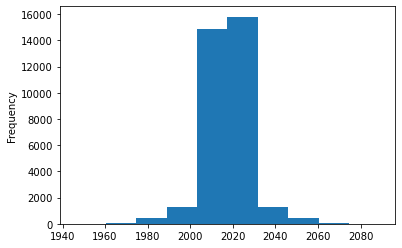

In [22]:
(df_merged['dob_yr'] + df_merged['age']).plot(kind='hist')

In [23]:
print((df_merged['dob_yr'] + df_merged['age']).value_counts().iloc[:4])
print((df_merged['dob_yr'] + df_merged['age']).value_counts().iloc[:3].sum())

(df_merged['dob_yr'] + df_merged['age']).value_counts().iloc[2:].sum()

2018.0    13405
2017.0    12900
2019.0      610
2020.0      183
dtype: int64
26915


7965

## Merge only campaign data with no missing targets

In [24]:
df_campaign_cl = df_campaign[~df_campaign['created_account'].isna()].copy()
print(len(df_campaign_cl))

3027


In [25]:
# duplicated participant_id
(df_campaign_cl.groupby('participant_id').count() > 2).any(1).sum()

0

In [26]:
df_campaign_clm = df_campaign_cl.merge(df_mortgage,
                     on=['name_title', 'first_name', 'last_name'],
                     how='left'
                    )

In [27]:
len(df_campaign_clm)

3686

In [28]:
df_campaign_clm[df_campaign_clm['participant_id'].duplicated(keep=False)].sort_values('participant_id').head().transpose()

,269,270,2378,2379,1756
participant_id,29416465319.0,29416465319.0,68366842955.0,68366842955.0,94746771782.0
name_title,NaN,NaN,NaN,NaN,NaN
first_name,Toby,Toby,Gary,Gary,Sean
last_name,Thomas,Thomas,Burton,Burton,Martin
age,25,25,64,64,50
postcode,EH7B 8JY,EH7B 8JY,EH3W 8GF,EH3W 8GF,EH7 3RP
marital_status,Never-married,Never-married,Widowed,Widowed,Married-civ-spouse
education,10th,10th,HS-grad,HS-grad,HS-grad
job_title,Electrical engineer,Electrical engineer,"Designer, blown glass/stained glass","Designer, blown glass/stained glass",Press sub
occupation_level,3,3,5,5,10


In [29]:
# mark the duplicated
is_duplicated = df_campaign_clm['participant_id'].duplicated(keep=False)

df_campaign_clm.loc[:, 'duplicated'] = 0
df_campaign_clm.loc[is_duplicated, 'duplicated'] = 1

In [30]:
df_campaign_clm['participant_id'].duplicated(keep=False).sum()

1160

In [31]:
# filter by age

2018.0    1303
2017.0    1212
2019.0      50
2020.0      24
Name: campaign_yr, dtype: int64


<AxesSubplot:ylabel='Frequency'>

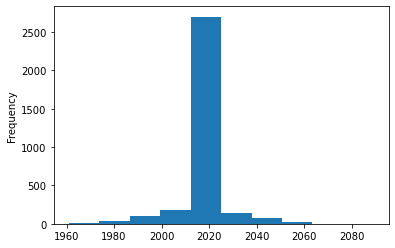

In [32]:
df_campaign_clm['dob_yr'] = pd.to_datetime(df_campaign_clm['dob']).dt.year
df_campaign_clm['campaign_yr'] = df_campaign_clm['dob_yr'] + df_campaign_clm['age']

print(df_campaign_clm['campaign_yr'].value_counts().iloc[:4])
df_campaign_clm['campaign_yr'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

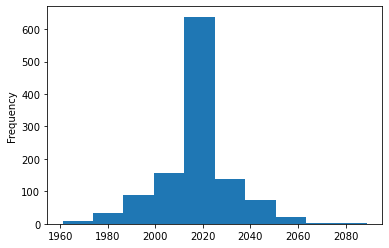

In [33]:
df_campaign_clm.loc[is_duplicated, 'campaign_yr'].plot(kind='hist')

In [34]:
is_right_age = df_campaign_clm['campaign_yr'].isin([2017, 2018, 2019])
df_campaign_clm.loc[is_duplicated & ~is_right_age].head().transpose()

,28,29,35,40,47
participant_id,5420320000000.0,5420320000000.0,2718770000000.0,4984910000000.0,6696990000000.0
name_title,Mr.,Mr.,NaN,NaN,NaN
first_name,Joseph,Joseph,Dylan,Glen,Kevin
last_name,Price,Price,Sinclair,Bennett,Gray
age,19,19,20,48,53
postcode,EH19 0GB,EH19 0GB,EH1R 4LY,EH7 7ES,SN3 6NH
marital_status,Never-married,Never-married,Never-married,Never-married,Married-civ-spouse
education,HS-grad,HS-grad,Some-college,11th,Bachelors
job_title,Health visitor,Health visitor,Event organiser,Medical physicist,"Accountant, chartered certified"
occupation_level,4,4,6,8,7


In [35]:
df_campaign_clm.loc[is_duplicated & df_campaign_clm['participant_id'].isin([5420320000000.0])].transpose()

,27,28,29
participant_id,5420320000000.0,5420320000000.0,5420320000000.0
name_title,Mr.,Mr.,Mr.
first_name,Joseph,Joseph,Joseph
last_name,Price,Price,Price
age,19,19,19
postcode,EH19 0GB,EH19 0GB,EH19 0GB
marital_status,Never-married,Never-married,Never-married
education,HS-grad,HS-grad,HS-grad
job_title,Health visitor,Health visitor,Health visitor
occupation_level,4,4,4


In [36]:
df_campaign_clm_cl = df_campaign_clm.drop(df_campaign_clm[is_duplicated & ~is_right_age].index).copy()
print(len(df_campaign_clm_cl))

3036


In [37]:
# mark the duplicated
is_duplicated = df_campaign_clm_cl['participant_id'].duplicated(keep=False)

df_campaign_clm_cl.loc[:, 'duplicated'] = 0
df_campaign_clm_cl.loc[is_duplicated, 'duplicated'] = 1

In [38]:
df_campaign_clm_cl[is_duplicated].head().transpose()

,23,24,71,72,344
participant_id,3513160000000.0,3513160000000.0,4075150000000.0,4075150000000.0,1662520000000.0
name_title,NaN,NaN,Mr.,Mr.,NaN
first_name,Christian,Christian,Edward,Edward,Samuel
last_name,Smith,Smith,Brown,Brown,Hill
age,43,43,30,30,30
postcode,EH10 9TB,EH10 9TB,EH40 6RP,EH40 6RP,EH93 0UW
marital_status,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Divorced
education,11th,11th,Bachelors,Bachelors,HS-grad
job_title,Games developer,Games developer,"Designer, ceramics/pottery","Designer, ceramics/pottery","Engineer, civil (consulting)"
occupation_level,9,9,4,4,3


In [39]:
# Use Postcode and postcode areas
df_campaign_clm_cl['post_area_code'] = df_campaign_clm_cl['postcode'].str.split(pat='\d', regex=True, expand=True)[0]

df_campaign_clm_cl['post_area_code'].unique()

array(['EH', 'LS', 'SN', 'LE', 'SR', 'SK', 'M', 'BS', 'S', 'OX', 'G',
       'EN', 'W', 'B', 'NW', 'L', 'DL', 'FY', 'GL', 'FK', 'DN', 'PR',
       'IM', 'E', 'NR', 'LN', 'BR', 'PL', 'AB', 'RM', 'TF', 'LL', 'N',
       'HD', 'GU', 'KW', 'IP', 'SM', 'CF', 'HU', 'SW', 'JE', 'EX', 'HP',
       'CH', 'ML', 'EC', 'SL', 'PO', 'WR', 'IG', 'BN', 'ZE', 'TS', 'WC',
       'SG', 'DH', 'UB', 'TD', 'DA', 'KA', 'BH', 'CT', 'CV', 'DE', 'WV',
       'MK', 'AL', 'NE', 'RG', 'BB', 'BD', 'CB', 'PH', 'ME', 'DT', 'TN',
       'WA', 'LA', 'CA', 'NP', 'TR', 'SY', 'HG', 'KT', 'CW'], dtype=object)

In [40]:
import requests as re
from bs4 import BeautifulSoup

# Post areas data on the web
post_area_url = 'https://en.wikipedia.org/wiki/List_of_postcode_areas_in_the_United_Kingdom'

table_class="wikitable"
response=re.get(post_area_url)
print(response.status_code)

# parse the html
soup = BeautifulSoup(response.text, 'html.parser')
post_area=soup.find('table',{'class':"wikitable"})

# read up with pandas
df_wikitables=pd.read_html(str(post_area))
df_post_areas = df_wikitables[0]

df_post_areas = df_post_areas.iloc[:,[0,1]].copy()
df_post_areas.columns=['postcode_area', 'postcode_area_name']

df_post_areas['postcode_area_name'] = df_post_areas['postcode_area_name'].str.split('[', expand=True).get(0)

df_post_areas['postcode_area_name'].unique()

200


array(['Aberdeen', 'St Albans', 'Birmingham', 'Bath', 'Blackburn',
       'Bradford', 'Bournemouth', 'Bolton', 'Brighton', 'Bromley',
       'Bristol', 'Belfast', 'Carlisle', 'Cambridge', 'Cardiff',
       'Chester', 'Chelmsford', 'Colchester', 'Croydon', 'Canterbury',
       'Coventry', 'Crewe', 'Dartford', 'Dundee', 'Derby', 'Dumfries',
       'Durham', 'Darlington', 'Doncaster', 'Dorchester', 'Dudley',
       'East London', 'East Central London', 'Edinburgh', 'Enfield',
       'Exeter', 'Falkirk', 'Blackpool', 'Glasgow', 'Gloucester',
       'Guildford', 'Harrow', 'Huddersfield', 'Harrogate',
       'Hemel Hempstead', 'Hereford', 'Hebrides', 'Hull', 'Halifax',
       'Ilford', 'Ipswich', 'Inverness', 'Kilmarnock',
       'Kingston upon Thames', 'Kirkwall', 'Kirkcaldy', 'Liverpool',
       'Lancaster', 'Llandrindod Wells', 'Leicester', 'Llandudno',
       'Lincoln', 'Leeds', 'Luton', 'Manchester', 'Medway',
       'Milton Keynes', 'Motherwell', 'North London',
       'Newcastle upon 

In [41]:
df_campaign_clm_cl['post_area_code']

0       EH
1       LS
2       EH
3       EH
4       SN
        ..
3681    CW
3682    EH
3683    EH
3684    OX
3685    EH
Name: post_area_code, Length: 3036, dtype: object

In [42]:
df_campaign_clm_cl = df_campaign_clm_cl.merge(df_post_areas, 
                         left_on='town',
                         right_on='postcode_area_name',
                         how='left',
                         validate='m:1')

In [43]:
df_campaign_clm_cl

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,...,race,native_country,workclass,demographic_characteristic,duplicated,dob_yr,campaign_yr,post_area_code,postcode_area,postcode_area_name
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,...,White,United Kingdom,State-gov,77516.0,0,1979.0,2018.0,EH,EH,Edinburgh
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,...,White,United Kingdom,Self-emp-not-inc,83311.0,0,1968.0,2018.0,LS,LS,Leeds
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,...,White,United Kingdom,Private,215646.0,0,1979.0,2017.0,EH,EH,Edinburgh
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,...,Black,United Kingdom,Private,234721.0,0,1965.0,2018.0,EH,EH,Edinburgh
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,...,Black,Sweden,Private,338409.0,0,1990.0,2018.0,SN,SN,Swindon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3031,3.916000e+12,Mr.,Peter,Kelly,51,CW73 2JD,Married-civ-spouse,Bachelors,"Engineer, maintenance (IT)",12,...,White,United Kingdom,Private,24185.0,0,1966.0,2017.0,CW,NaN,NaN
3032,3.011850e+12,Mr.,Daniel,Hill,38,EH5B 9JU,Never-married,10th,"Librarian, public",2,...,Black,?,Private,53930.0,0,1979.0,2017.0,EH,EH,Edinburgh
3033,6.762330e+12,Miss,Brandon,Cross,24,EH8 0GB,Never-married,HS-grad,Barrister,2,...,White,United Kingdom,Private,85088.0,0,1993.0,2017.0,EH,EH,Edinburgh
3034,1.736350e+11,NaN,Kieran,Preston,45,OX6 4QN,Married-civ-spouse,HS-grad,Cytogeneticist,6,...,White,England,Self-emp-not-inc,94962.0,0,1973.0,2018.0,OX,OX,Oxford


In [44]:
is_duplicated = df_campaign_clm_cl['duplicated']==1
is_postarea_match = df_campaign_clm_cl['post_area_code']==df_campaign_clm_cl['postcode_area']

df_campaign_clm_cl[is_duplicated & ~is_postarea_match].head().transpose()

,24,62,755,818,1069
participant_id,3513160000000.0,4075150000000.0,8614360000000.0,1250670000000.0,2498000000000.0
name_title,NaN,Mr.,NaN,NaN,Mr.
first_name,Christian,Edward,Frank,Damian,Geoffrey
last_name,Smith,Brown,Green,Wood,Robinson
age,43,30,54,56,35
postcode,EH10 9TB,EH40 6RP,EH5 6JP,SN9J 8RT,SN0 5ZJ
marital_status,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse
education,11th,Bachelors,HS-grad,Some-college,Prof-school
job_title,Games developer,"Designer, ceramics/pottery",Drilling engineer,Herbalist,Principal Data Scientist
occupation_level,9,4,4,4,12


In [45]:
df_campaign_clm_cl.loc[is_duplicated & df_campaign_clm_cl['participant_id'].isin([1250670000000.0])].transpose()

,817,818
participant_id,1250670000000.0,1250670000000.0
name_title,NaN,NaN
first_name,Damian,Damian
last_name,Wood,Wood
age,56,56
postcode,SN9J 8RT,SN9J 8RT
marital_status,Married-civ-spouse,Married-civ-spouse
education,Some-college,Some-college
job_title,Herbalist,Herbalist
occupation_level,4,4


In [46]:
df_campaign_clm_cl_cl = df_campaign_clm_cl.drop(df_campaign_clm_cl[is_duplicated & ~is_postarea_match].index)

In [47]:
df_campaign_clm_cl_cl[df_campaign_clm_cl_cl['participant_id'].duplicated(keep=False)].sort_values('participant_id').head(6).transpose()

,841,840,2130,2129,273,274
participant_id,573369000000.0,573369000000.0,1228910000000.0,1228910000000.0,1662520000000.0,1662520000000.0
name_title,NaN,NaN,NaN,NaN,NaN,NaN
first_name,Tom,Tom,Mitchell,Mitchell,Samuel,Samuel
last_name,Green,Green,Wright,Wright,Hill,Hill
age,63,63,20,20,30,30
postcode,EH8Y 7BR,EH8Y 7BR,EH54 3BG,EH54 3BG,EH93 0UW,EH93 0UW
marital_status,Widowed,Widowed,Never-married,Never-married,Divorced,Divorced
education,HS-grad,HS-grad,Some-college,Some-college,HS-grad,HS-grad
job_title,Dancer,Dancer,Designer,Designer,"Engineer, civil (consulting)","Engineer, civil (consulting)"
occupation_level,9,9,11,11,3,3


# Clean `salary_band`

In [48]:
df_campaign_clm_cl_cl['salary_band'].unique()

array(['£18109 yearly', '£16945 yearly', '£729.87 pw', ..., 'ETC',
       '£13536 yearly', '£1568.86 per month'], dtype=object)

In [47]:
df_campaign_clm_cl_cl['salary_band'].str.split(' ', n=1, expand=True)[1].unique()[:10]

array(['yearly', 'pw', 'per month', nan, '- 28010 range', None,
       '- 118354 range', '- 26510 range', '- 21470 range',
       '- 27299 range'], dtype=object)

In [49]:
import regex as reg

In [51]:
reg.match('([\A-Z]+)', 'ETC').ipynb_checkpoints/

<regex.Match object; span=(0, 3), match='ETC'>

In [54]:
reg.split('([\A-Z]+)', '1235.23ETC')

['1235.23', 'ETC', '']

In [56]:
reg.split('([\A-Z]+)', 'ETC')

['', 'ETC', '']

In [57]:
import regex as reg

def clelan_salary_band(salary):
    """
    TODO
    """
    
    
    if pd.isna(salary):
        lower = 0
        upper = 0
        freq = pd.NA
        currency = pd.NA
        
    elif any([period in salary for period in ['yearly', 'pw', 'per month']]):
        sal = salary.split(' ', 1)[0][1:]
                
        lower = sal
        upper = sal
        freq = salary.split(' ', 1)[1]
        
        if '£' in salary:
            currency = 'GBP'
    
    elif ' range' in salary:
        sal = salary.split(' ')
        
        lower = sal[0][1:]
        upper = sal[2]
        freq = 'yearly'
                
        if '£' in salary:
            currency = 'GBP'
    
    elif len(salary)>3:
        lower = salary[:-3]
        upper = salary[:-3]
        freq = pd.NA
        currency = salary[-3:]
    
    else:
        lower = 0
        upper = 0
        freq = pd.NA
        currency = pd.NA

#     lower = pd.to_numeric(lower)
#     upper = pd.to_numeric(upper)
    
    

    return pd.Series([lower, upper, freq, currency])
        

In [58]:
df_campaign_clm_cl_cl['salary_band'].apply(clelan_salary_band)

,0,1,2,3
0,18109,18109,yearly,GBP
1,16945,16945,yearly,GBP
2,729.87,729.87,pw,GBP
3,19087,19087,yearly,GBP
4,2741.5,2741.5,per month,GBP
...,...,...,...,...
3031,0,0,<NA>,<NA>
3032,13536,13536,yearly,GBP
3033,1568.86,1568.86,per month,GBP
3034,17400,31538,yearly,GBP


In [59]:
# print(df_campaign_clm_cl_cl['salary_band'].fillna(0).values.tolist())
df_campaign_clm_cl_cl[['sal_lower', 'sal_upper', 'sal_freq', 'sal_currency']] = df_campaign_clm_cl_cl['salary_band'].apply(clelan_salary_band)

In [60]:
is_no_sal = (df_campaign_clm_cl_cl[['sal_lower', 'sal_upper', 'sal_freq', 'sal_currency']]==0).any(1)
is_no_sal

0       False
1       False
2       False
3       False
4       False
        ...  
3031     True
3032    False
3033    False
3034    False
3035     True
Length: 3013, dtype: bool

In [61]:
df_campaign_clm_cl_cl.loc[is_no_sal, ['salary_band'] + ['sal_lower', 'sal_upper', 'sal_freq', 'sal_currency']]

,salary_band,sal_lower,sal_upper,sal_freq,sal_currency
8,NaN,0,0,<NA>,<NA>
12,NaN,0,0,<NA>,<NA>
19,NaN,0,0,<NA>,<NA>
29,NaN,0,0,<NA>,<NA>
38,NaN,0,0,<NA>,<NA>
...,...,...,...,...,...
2994,NaN,0,0,<NA>,<NA>
3000,NaN,0,0,<NA>,<NA>
3002,NaN,0,0,<NA>,<NA>
3031,ETC,0,0,<NA>,<NA>


In [62]:
df_campaign_clm_cl_cl.loc[is_no_sal, 'salary_band'].unique()

array([nan, 'BC', 'BCH', 'XDN', 'EOS', 'NXT', 'FTH', 'NMC', 'MZC', 'XMR',
       'ETC'], dtype=object)

In [63]:
print(len(df_campaign_clm_cl_cl[df_campaign_clm_cl_cl['participant_id'].duplicated(keep=False)]))
df_campaign_clm_cl_cl[df_campaign_clm_cl_cl['participant_id'].duplicated(keep=False)].head(6).transpose()

26


,273,274,522,523,547,559
participant_id,1662520000000.0,1662520000000.0,3314170000000.0,3314170000000.0,7696770000000.0,4347620000000.0
name_title,NaN,NaN,Mr.,Mr.,NaN,NaN
first_name,Samuel,Samuel,Damian,Damian,Martyn,Allan
last_name,Hill,Hill,Johnson,Johnson,Hughes,Anderson
age,30,30,37,37,35,28
postcode,EH93 0UW,EH93 0UW,SN7U 7RY,SN7U 7RY,SN9X 7NP,EH26 7XY
marital_status,Divorced,Divorced,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
education,HS-grad,HS-grad,Some-college,Some-college,Some-college,Bachelors
job_title,"Engineer, civil (consulting)","Engineer, civil (consulting)","Journalist, newspaper","Journalist, newspaper",Medical physicist,Senior Data Scientist
occupation_level,3,3,7,7,8,11


In [64]:
df_campaign_clm_cl_cl['sal_lower'] = pd.to_numeric(df_campaign_clm_cl_cl['sal_lower'], errors='coerce')
df_campaign_clm_cl_cl['sal_upper'] = pd.to_numeric(df_campaign_clm_cl_cl['sal_upper'], errors='coerce')

## Convert Salaries
- Convert to GBP
- Convert to per annum

In [65]:
df_campaign_clm_cl_cl.head()

,participant_id,name_title,first_name,last_name,age,postcode,marital_status,education,job_title,occupation_level,...,duplicated,dob_yr,campaign_yr,post_area_code,postcode_area,postcode_area_name,sal_lower,sal_upper,sal_freq,sal_currency
0,8.997000e+12,Mr.,Dale,Coles,39,EH4 9FL,Never-married,Bachelors,Furniture conservator/restorer,1,...,0,1979.0,2018.0,EH,EH,Edinburgh,18109.00,18109.00,yearly,GBP
1,2.764970e+12,NaN,Joel,Allen,50,LS5H 0JG,Married-civ-spouse,Bachelors,"Administrator, sports",4,...,0,1968.0,2018.0,LS,LS,Leeds,16945.00,16945.00,yearly,GBP
2,8.454880e+12,Mr.,Craig,Davis,38,EH8W 2QJ,Divorced,HS-grad,Armed forces training and education officer,12,...,0,1979.0,2017.0,EH,EH,Edinburgh,729.87,729.87,pw,GBP
3,5.781320e+12,Mr.,Brandon,Thornton,53,EH2 5UE,Married-civ-spouse,11th,Facilities assistant,1,...,0,1965.0,2018.0,EH,EH,Edinburgh,19087.00,19087.00,yearly,GBP
4,8.687490e+12,Miss,Brett,Fletcher,28,SN19 0PU,Married-civ-spouse,Bachelors,Information systems manager,12,...,0,1990.0,2018.0,SN,SN,Swindon,2741.50,2741.50,per month,GBP


In [66]:
df_campaign_clm_cl_cl['sal_currency'].value_counts()

GBP    2342
LKR       6
AMD       5
MZN       4
XOF       4
       ... 
ISK       1
MMK       1
HRK       1
BBD       1
CNY       1
Name: sal_currency, Length: 130, dtype: int64

In [67]:
from google_currency import convert
import json

In [68]:
conversion_rate = {}

currencies = df_campaign_clm_cl_cl['sal_currency'].unique()
currencies = currencies[~pd.isna(currencies)]

for currency in currencies:
    
    rate = json.loads(convert(currency, 'GBP', 1))
    
    if rate.get("converted"):
        conversion_rate[currency] = rate.get("amount")
    else:
        conversion_rate[currency] = pd.NA

Invalid currency codes passed in parameters, original exception message is -> 'IMP'
Invalid currency codes passed in parameters, original exception message is -> 'GGP'
Unable to convert currency, failed to fetch results from Google
Invalid currency codes passed in parameters, original exception message is -> 'SPL'
Invalid currency codes passed in parameters, original exception message is -> 'JEP'
Invalid currency codes passed in parameters, original exception message is -> 'WST'
Invalid currency codes passed in parameters, original exception message is -> 'MNT'
Invalid currency codes passed in parameters, original exception message is -> 'LTL'
Invalid currency codes passed in parameters, original exception message is -> 'RST'
Invalid currency codes passed in parameters, original exception message is -> 'TVD'
Unable to convert currency, failed to fetch results from Google
Invalid currency codes passed in parameters, original exception message is -> 'VUV'
Invalid currency codes passed in

In [69]:
rate

{'from': 'CNY', 'to': 'GBP', 'amount': '0.12', 'converted': True}

In [70]:
convert('VUV', 'GBP', 1)

Invalid currency codes passed in parameters, original exception message is -> 'VUV'


'{"from": "VUV", "to": "GBP", "amount": 0, "converted": false}'

In [71]:
1/float(conversion_rate['HUF'])

476.1904761904762

In [72]:
df_campaign_clm_cl_cl['sal_togbp_rate'] = pd.to_numeric(df_campaign_clm_cl_cl['sal_currency'].map(conversion_rate), errors='coerce')

In [73]:
df_campaign_clm_cl_cl['sal_freq'].unique()
freq_conversion_factor = {'yearly': 1, 'pw': 52, 'per month': 12}

In [74]:
df_campaign_clm_cl_cl['sal_toyearly_factor'] = df_campaign_clm_cl_cl['sal_freq'].map(freq_conversion_factor)
df_campaign_clm_cl_cl[['sal_freq', 'sal_toyearly_factor']]

,sal_freq,sal_toyearly_factor
0,yearly,1.0
1,yearly,1.0
2,pw,52.0
3,yearly,1.0
4,per month,12.0
...,...,...
3031,<NA>,NaN
3032,yearly,1.0
3033,per month,12.0
3034,yearly,1.0


In [75]:
df_campaign_clm_cl_cl['sal_mid_gbp'] = (df_campaign_clm_cl_cl['sal_upper']+df_campaign_clm_cl_cl['sal_lower'])/2 \
                                        * df_campaign_clm_cl_cl['sal_togbp_rate'] \
                                        * df_campaign_clm_cl_cl['sal_toyearly_factor']

In [76]:
print(df_campaign_clm_cl_cl[['sal_mid_gbp']].describe())
df_campaign_clm_cl_cl['sal_mid_gbp'] #.plot(kind='hist')

         sal_mid_gbp
count    2341.000000
mean    28437.768979
std     17502.483502
min     13072.560000
25%     19037.000000
50%     22972.000000
75%     31808.000000
max    254210.500000


0       18109.00
1       16945.00
2       37953.24
3       19087.00
4       32898.00
          ...   
3031         NaN
3032    13536.00
3033    18826.32
3034    24469.00
3035         NaN
Name: sal_mid_gbp, Length: 3013, dtype: float64

In [77]:
df_campaign_clm_cl_cl[df_campaign_clm_cl_cl['sal_mid_gbp']>200_000].transpose()

,778,2868
participant_id,2243000000000.0,2336520000000.0
name_title,Mr.,Dr.
first_name,Shaun,Wayne
last_name,Atkinson,Day
age,43,40
postcode,SN7M 8EH,L9 0QD
marital_status,Married-civ-spouse,Never-married
education,Bachelors,Prof-school
job_title,Health physicist,Prime Minister
occupation_level,9,20


## Duplicates

In [79]:
print('Duplicated participants: ', len(df_campaign_clm_cl_cl[df_campaign_clm_cl_cl['participant_id'].duplicated(keep=False)]))

Duplicated participants:  26


In [80]:
df_campaign_clm_cl_cl = df_campaign_clm_cl_cl.drop_duplicates(subset='participant_id', keep=False)

## Save cleaned data

In [81]:
df_campaign_clm_cl_cl.to_parquet('../data/1_interim/1_merged_data.parquet')